In [ ]:
import pandas as pd
df = pd.read_csv("/content/Employee.csv")
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
df.duplicated().sum()

1889

In [ ]:
df1 = df.drop_duplicates()

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## Data Encoding

In [ ]:
df1["City"].value_counts()

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64

In [ ]:
df1["Gender"].value_counts()

Male      1529
Female    1235
Name: Gender, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder()

In [ ]:
encoder.fit(df1[["City"]])
res = encoder.transform(df1[["City"]]).toarray()
df1[["Bangalore","New Delhi","Pune"]]  = res

<ipython-input-10-1ad641540102>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["Bangalore","New Delhi","Pune"]]  = res
<ipython-input-10-1ad641540102>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["Bangalore","New Delhi","Pune"]]  = res
<ipython-input-10-1ad641540102>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
encoder.fit(df1[["Gender"]])
res = encoder.transform(df1[["Gender"]]).toarray()
df1[["Female","Male"]]  = res

<ipython-input-11-b15b1d59478c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["Female","Male"]]  = res
<ipython-input-11-b15b1d59478c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["Female","Male"]]  = res


In [ ]:
df1.drop(["City","Gender"], axis=1)

,Education,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bangalore,New Delhi,Pune,Female,Male
0,Bachelors,2017,3,34,No,0,0,1.0,0.0,0.0,0.0,1.0
1,Bachelors,2013,1,28,No,3,1,0.0,0.0,1.0,1.0,0.0
2,Bachelors,2014,3,38,No,2,0,0.0,1.0,0.0,1.0,0.0
3,Masters,2016,3,27,No,5,1,1.0,0.0,0.0,0.0,1.0
4,Masters,2017,3,24,Yes,2,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,2,31,No,2,0,0.0,0.0,1.0,1.0,0.0
4647,Bachelors,2016,3,30,No,2,0,0.0,0.0,1.0,0.0,1.0
4649,Masters,2013,2,37,No,2,1,0.0,0.0,1.0,0.0,1.0
4650,Masters,2018,3,27,No,5,1,0.0,1.0,0.0,0.0,1.0


In [ ]:
ordinal_columns = df1.select_dtypes("O").columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
model_le= LabelEncoder()

In [ ]:
for col in ordinal_columns:
  df1[col]= model_le.fit_transform(df1[col])

<ipython-input-15-b2feef82ab47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]= model_le.fit_transform(df1[col])
<ipython-input-15-b2feef82ab47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]= model_le.fit_transform(df1[col])
<ipython-input-15-b2feef82ab47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
df1.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bangalore,New Delhi,Pune,Female,Male
0,0,2017,0,3,34,1,0,0,0,1.0,0.0,0.0,0.0,1.0
1,0,2013,2,1,28,0,0,3,1,0.0,0.0,1.0,1.0,0.0
2,0,2014,1,3,38,0,0,2,0,0.0,1.0,0.0,1.0,0.0
3,1,2016,0,3,27,1,0,5,1,1.0,0.0,0.0,0.0,1.0
4,1,2017,2,3,24,1,1,2,1,0.0,0.0,1.0,0.0,1.0


## Data Balancing

<Axes: >

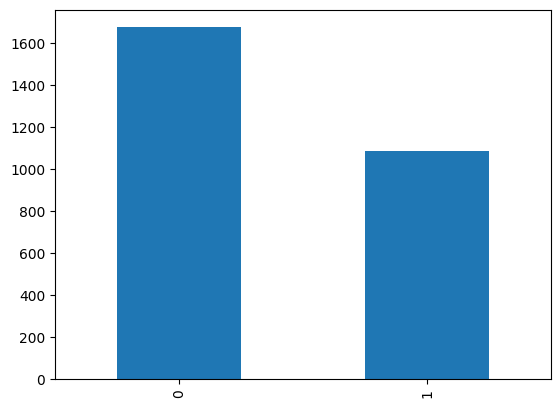

In [ ]:
df1.LeaveOrNot.value_counts().plot(kind="bar")

In [ ]:
x= df1.drop("LeaveOrNot", axis=1)
y= df1.LeaveOrNot

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
x_new, y_new = sampler.fit_resample(x,y)

<Axes: >

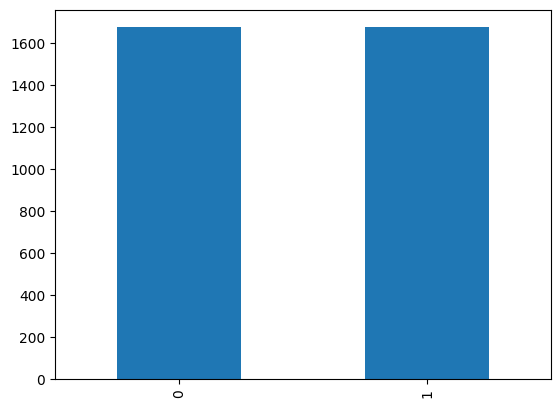

In [ ]:
y_new.value_counts().plot(kind="bar")

In [ ]:
df1.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bangalore,New Delhi,Pune,Female,Male
0,0,2017,0,3,34,1,0,0,0,1.0,0.0,0.0,0.0,1.0
1,0,2013,2,1,28,0,0,3,1,0.0,0.0,1.0,1.0,0.0
2,0,2014,1,3,38,0,0,2,0,0.0,1.0,0.0,1.0,0.0
3,1,2016,0,3,27,1,0,5,1,1.0,0.0,0.0,0.0,1.0
4,1,2017,2,3,24,1,1,2,1,0.0,0.0,1.0,0.0,1.0


## Data Scailing

In [ ]:
col = ["JoiningYear","Age"]

In [ ]:
x[col]

,JoiningYear,Age
0,2017,34
1,2013,28
2,2014,38
3,2016,27
4,2017,24
...,...,...
4645,2017,31
4647,2016,30
4649,2013,37
4650,2018,27


In [ ]:
from sklearn.preprocessing import MinMaxScaler
model= MinMaxScaler(feature_range=(1,5))
model.fit(x[col])
x[col] = model.transform(x[col])
df1[col] = x[col]

<ipython-input-24-80cb8ed4c74f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = x[col]


In [ ]:
df1.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bangalore,New Delhi,Pune,Female,Male
0,0,4.333333,0,3,3.526316,1,0,0,0,1.0,0.0,0.0,0.0,1.0
1,0,1.666667,2,1,2.263158,0,0,3,1,0.0,0.0,1.0,1.0,0.0
2,0,2.333333,1,3,4.368421,0,0,2,0,0.0,1.0,0.0,1.0,0.0
3,1,3.666667,0,3,2.052632,1,0,5,1,1.0,0.0,0.0,0.0,1.0
4,1,4.333333,2,3,1.421053,1,1,2,1,0.0,0.0,1.0,0.0,1.0


## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## 1) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_lr.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score : ", acc)

Accuracy Score :  0.6455847255369929


## 2) KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_kn = KNeighborsRegressor()
model_kn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred= model_kn.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score : ", acc)


Accuracy Score :  0.6789976133651552


## 3) SVM

In [ ]:
from sklearn.svm import SVR
model_sv = SVR()
model_sv.fit(x_train,y_train)

SVR()

In [ ]:
y_pred= model_sv.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score : ", acc)


Accuracy Score :  0.4988066825775656


## 4) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt= DecisionTreeRegressor()
model_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred= model_dt.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score : ", acc)


Accuracy Score :  0.6933174224343676


## 5) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf= RandomForestRegressor()
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred= model_rf.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score : ", acc)


Accuracy Score :  0.7315035799522673


## 6) Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred= model_nb.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score : ", acc)


Accuracy Score :  0.5847255369928401


## 7) MLP

In [ ]:
from sklearn.neural_network import MLPRegressor
model_mlp= MLPRegressor()
model_mlp.fit(x_train, y_train)

MLPRegressor()

In [ ]:
y_pred= model_mlp.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score : ", acc)

Accuracy Score :  0.5190930787589498


## 8) Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb= GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred= model_gb.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score : ", acc)

Accuracy Score :  0.7768496420047732


## 9) Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gn= GaussianNB()
model_gn.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred= model_gn.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score : ", acc)

Accuracy Score :  0.6073985680190931


## 10) Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model_et= ExtraTreesRegressor()
model_et.fit(x_train, y_train)

ExtraTreesRegressor()

In [ ]:
y_pred= model_et.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score : ", acc)

Accuracy Score :  0.7195704057279236
